In [1]:
import numpy as np
import matplotlib.pyplot as plt

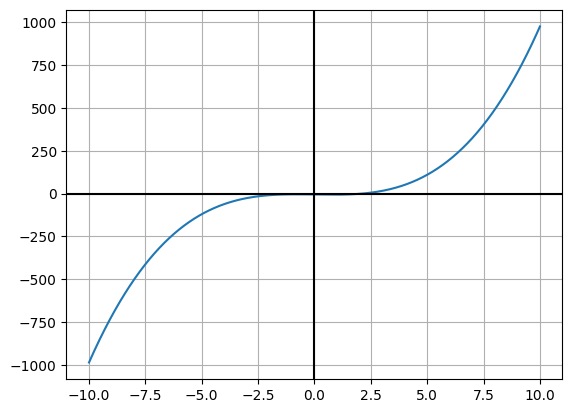

In [6]:
def non_linear_func(x):
    return x**3 - 2*x -5

x = np.linspace(-10, 10, 1000)
y = non_linear_func(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

In [7]:
def f_prime(x):
    return 3*x**2 - 2

In [29]:
def arae(x_prev, x_pres): #function of absolute relative approximation error
    return abs((x_pres - x_prev)/x_pres) * 100

def plot(f, f_prime, x0, new_x):
    x = np.linspace(-10, 10, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=3) #drawing the curve at each iteration
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axvline(x=new_x, color='g', linestyle='--', label='$x_{i+1}$') #plot the new point of x vertically

    #draw the tangent line for
    x1 = np.linspace(x0-0.05, x0+0.05, 100)
    y1 = f_prime(x0)*(x1-x0) + f(x0) #equation of drawing linear line

    plt.plot(x1, y1, 'r', label='f\'(x)') # drawing the slope at w.r.t the point x0
    plt.axvline(x=x0, color='orange', linestyle='--', label='$x_{i}$')
    plt.scatter(x0, f(x0), color='r') #speicify the point x0,f(x0) in the graph
    plt.grid()
    plt.legend()
    plt.show()

In [30]:
def newton_raphson(f, f_prime, x0, error_tol, max_iter):
    x = x0
    x_prev = None
    error = 1e10010
    for i in range(max_iter):
        x = x - f(x)/f_prime(x)
        if x_prev is not None:
            plot(f, f_prime, x_prev, x)
            error = arae(x_prev, x)
            if error < error_tol:
                print("Converged")
                print(f"Error after iteration {i+1}: {error}")
                return x
        x_prev = x
        print(f"Value of x after iteration {i+1}: {x}")
        print(f"Error after iteration {i+1}: {error}")
        print()
    print("here")
    return x

Value of x after iteration 1: 2.1
Error after iteration 1: inf



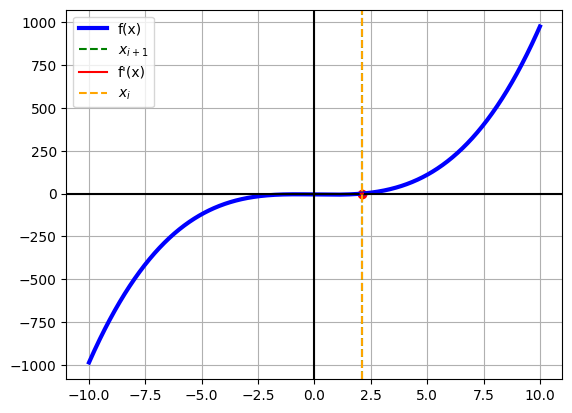

Value of x after iteration 2: 2.094568121104185
Error after iteration 2: 0.2593316894821963



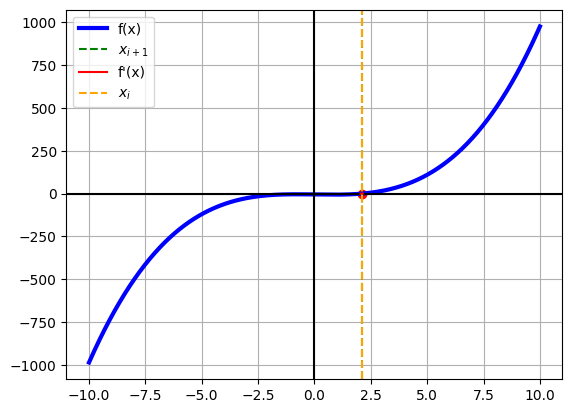

Converged
Error after iteration 3: 0.0007944137984358022


2.094551481698199

In [31]:
newton_raphson(non_linear_func, f_prime, 2, 0.001, 100)

Secant Method

In [53]:
def arae(x_prev, x_pres): #function of absolute relative approximation error
    return abs((x_pres - x_prev)/x_pres) * 100

def plot(f, f_prime, x0,x1, new_x):
    x = np.linspace(-10, 10, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=3) #drawing the curve at each iteration
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axvline(x=new_x, color='g', linestyle='--', label='$x_{i+1}$') #plot the new point of x vertically

    #draw the tangent line for
    x1 = np.linspace(x0-0.05, x0+0.05, 100)
    y1 = f_prime(x0)*(x1-x0) + f(x0) #equation of drawing linear line

    plt.plot(x1, y1, 'r', label='f\'(x)') # drawing the slope at w.r.t the point x0
    plt.axvline(x=x0, color='orange', linestyle='--', label='$x_{i}$')
    plt.scatter(x0, f(x0), color='r') #speicify the point x0,f(x0) in the graph
    plt.grid()
    plt.legend()
    plt.show()

In [65]:
import matplotlib.pyplot as plt

def secant(f, f_prime, x0, x1, error_tol, max_iter):
    x = x1
    x_prev = x0

    for i in range(max_iter):
        if f(x) == f(x_prev):
            print(f"Warning: f(x) == f(x_prev) at iteration {i+1}")
            return None
            error = arae(x_prev, x)
            error = abs(x - x_prev)




        x_new = x - f(x) * (x - x_prev) / (f(x) - f(x_prev))


        error = abs(x_new - x)



        if error < error_tol:
            print("Converged")
            print(f"Root after iteration {i+1}: {x_new}")
            print(f"Error after iteration {i+1}: {error}")
            return x_new


        x_prev = x
        x = x_new


        print(f"Value of x after iteration {i+1}: {x}")
        print(f"Error after iteration {i+1}: {error}")
        print()

    print("Max iterations reached without convergence.")
    return x




In [66]:
secant(non_linear_func, f_prime, 1.75,2,0.001, 100)

Value of x after iteration 1: 2.116788321167883
Error after iteration 1: 0.11678832116788307

Value of x after iteration 2: 2.093332604004018
Error after iteration 2: 0.023455717163864964

Value of x after iteration 3: 2.0945363511985726
Error after iteration 3: 0.0012037471945545164

Converged
Root after iteration 4: 2.094551491929981
Error after iteration 4: 1.514073140818084e-05


2.094551491929981